Group Name: AG 03.

Student Name (Student ID):

1. xxxx xxxxx (xxxxxxx)

2. xxxx xxxxx (xxxxxxx)

3. xxxx xxxxx (xxxxxxx)

# Question 2

## Introduction to question 2

In the second question of this assignment, we will explore the use of local search in genome assembly.

We will use local search to assemble (construct) a large part of the nucleotide sequence of the monkeypox virus, which has been downloaded from the National Center for Biotechnology Information in the United States. Please note that no additional or specialized knowledge of biology or bioinformatics is required for this assignment. (Actually, the technical specifics of bioinformatics have been adapted and simplified for the purposes of this computer science assignment, so if you are a biologist, please do not apply preexisting knowledge to solve the problem. Furthermore, you should not attempt to search up the genome on genomic databases to "guess" the actual sequence, since we are more interested in your coding methodology rather than your attempts at reproducing a known sequence.)

This is an introductory computer science assignment and not a bioinformatics assignment; we are simply using bioinformatics as a use case to illustrate the applicability of local search to the natural sciences. Therefore, no knowledge of bioinformatics is assumed or required. In the paragraphs that follow, I will give a short crash course which will cover all the domain knowledge you will need to know in order to tackle this problem.  

For technical reasons, when we analyze the nucleotide sequence (genome) of a virus, we usually cannot “read” it in one fell swoop. We have to read the genome in parts, because the genome is usually too long for the machine to read in a single sitting. To simplify things, a “read” is a single view of part of the genome; think of it as a SUBSTRING, a partial view of the whole genome. After we have generated multiple reads of a genome, we then have to “stitch”, or combine, the different reads of the genome together. This process of stitching up reads of a genome into the final sequence is known as genome assembly. However, the different reads of the genome cannot just be concatenated like usual string concatenation. It’s not a situation where you have one read, “Hello”, and another read, “World”, and all you need to do is concatenate both strings together to make “Hello World”. Among other reasons, there are two major reasons why you can’t do so:

1. You do not know which read came first. The reads are not ordered. How do you know “Hello” came after “World”? The answer is that you don’t. Imagine how complicated this situation might be if you had more than two reads. (This is indeed our situation, where we have $n$ reads, and $n>>2$.)

2. One read may contain a substring contained in another read. Specifically, without loss of generality, part of the ending $x$ characters of a read (i.e., suffix) might also be found in the starting $x$ positions (i.e., prefix) of another read.

- A computer scientist usually creates opportunities from problems. While this may be a “problem” in that you just can’t concatenate two strings blindly, the fact that strings contain shared “substrings” is actually a very helpful clue that you can use to “join” strings together. 

- Note that the choice of the value of $x$ could be a hyperparameter decided by the computer scientist.

## Your tasks

In this part of the assignment, you will work with (simulated) reads that I have generated from the nucleotide sequence of the monkeypox virus. In reality, bioinformatics is far more complicated, but here we will work with a simplified situation. Your task is to examine the reads that I have provided for you, and from there “infer” the nucleotide sequence that might have produced those reads. 

The reads are provided in the csv file `data.csv` which simply provides a list of unique strings. Note that you should NOT assume any particular ordering of the strings in this dataframe. In fact, the strings have already been shuffled randomly. 

NOTE: You are not allowed to use `pandas` or any other libraries apart from the Python STL to load the csv file.

### Task A (3 marks): 

Create a directed graph. The nodes in the graph are the strings in the list of reads. An edge should be drawn FROM read A TO read B if and only if a suffix (of length $x$) of read A is also a prefix (obviously, also of length $x$) of read B. For the purposes of the assignment, limit the value of $x$ to between 5 and 30, both inclusive. That is, to be clear, $5\leq x\leq 30$. The weight of an edge between read A and read B should be the NEGATED value of $x$, i.e. $-x$. 

In your Jupyter notebook, please report the number of edges in your graph. Provide a barplot or histogram which shows the number of edges with different weights or weight categories. In this task, you are free to use plotting libraries such as `matplotlib` or `seaborn` to plot this graph.

As an example, if read A is "TACTAGT" and read B is "TAGTCCCCT", then an edge is drawn FROM read A TO read B (i.e., $A \rightarrow B$) with weight of $-4$. This is because the 4-suffix "TAGT" is also the 4-prefix of read B; in other words, the last 4 characters of read A (a substring of length 4) overlap with the first 4 characters of read B (a substring of length 4).

### Task B (7 marks): 

From Task A, you now have a graph which shows connections between reads based on how they overlap, in theory you could draw a path through the graph and thereby derive the full sequence (genome).

Task B asks you to use local search method(s) to determine a path through this directed graph of strings. 

- You are expected to use simulated annealing and tune the relevant configuration settings and hyperparameters. The minimum requirement is to implement simulated annealing.

- Explain tha rationale behind the choice of scheduling strategy and parameters.

- However, you may also explore other search methods in addition to simulated annealing. Marks will be awarded for effort.

Note the following constraints:

1. The path has to go through each and every vertex exactly once. For computer scientists, this constraint is reminiscent of the "Traveling Salesman's Problem", except that unlike TSP, we should not need to go back to the starting vertex again. 

2. For the purposes of neighbor generation / action selection at each node, bear in mind that a path through the graph which minimizes the total number of nucleotides in the assembled sequence is the preferred path. To state that another way, the assembled sequence should be derived from a path that goes through EACH and EVERY vertex exactly once, however we want this assembled sequence to be AS SHORT AS POSSIBLE.

3. You are not given the starting (source/origin) or ending (destination) vertex.

4. For avoidance of ambiguity, no cycles are allowed. You must not visit a vertex more than once.

5. You are not allowed to use any libraries apart from the Python Standard Library.
No import statements which import libraries outside of the Python STL should be found within your answer for Task B.

Please remember to report the assembled sequence that you obtain. Although it would be great if you can come up with a good sequence, please feel reassured that we are more interested in your APPROACH to the problem, and so you can potentially get a reasonable score on this task even if your solution is "wrong". It is the process, rather than the result, which matters more.

In [1]:
# Problem Class
class Problem:
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(
            initial=initial, 
            goal=goal, 
            **kwds)  #🔴what is this? 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)

In [2]:
# Use the following Node class to generate search tree
import math
class Node:
    """A node in a search tree. Contains a pointer to the parent (the node
    that this is a successor of) and to the actual state for this node. Note
    that if a state is arrived at by two paths, then there are two nodes with
    the same state. Also includes the action that got us to this state, and
    the total path_cost (also known as g) to reach the node. Other functions
    may add an f and h value; see best_first_graph_search and astar_search for
    an explanation of how the f and h values are handled. You will not need to
    subclass this class."""

    def __init__(self, state, parent=None, action=None, path_cost=0):
        """Create a search tree Node, derived from a parent by an action."""
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def __repr__(self):
        return "<Node {}>".format(self.state)

    def __lt__(self, node):
        return self.state < node.state

    def expand(self, problem):
        """List the nodes reachable in one step from this node."""
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        """[Figure 3.10]"""
        next_state = problem.result(self.state, action)
        next_node = Node(next_state, self, action, problem.path_cost(self.path_cost, self.state, action, next_state))
        return next_node

    def solution(self):
        """Return the sequence of actions to go from the root to this node."""
        return [node.action for node in self.path()[1:]]

    def path(self):
        """Return a list of nodes forming the path from the root to this node."""
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))


In [3]:
# Code to generate neighbours, value of states, etc.
class TSP(Problem):
    #Implement TSP class here
    pass

# Part 1 - Implementation of a graph structure of data.csv. 


Input Data: to be structured into a dictionary using {index:read_sequence} 

## Graph Datatype
Directed Graph: to be built as an adjacency matrix

*Example of Directed Graph Data Format*
```
Adjacency Dictionary 
directed_graph = {
                    A : [(B,4), (C,1), ..., (F,3)], 
                    B : [(E,5), (H,3), ..., (J,3)], 
                    ...
                    }  #letters to be index and numbers to be overlap. 
```

```
Adjacency List 
directed_graph = [
                    [A, B, 5], 
                    [A, C, 3], 
                    [D, E, 2],
                    ....
                    ]  #letters to be index. 
```


For simplicity, decision to build graph as an adjacency list first. To build the graph, we will iterate through edge weights and count the numbers. This to be done as a once off, static output. For future optimization, this could be implemented as a lookup table of suffixes and prefixes in the format {suffix/prefix: id1, id2, idx} and set overlaps used to generate dynamic outputs. 

In [4]:
import csv
from pprint import pprint

# Import the data, discarding column 2 because its similar to column 1
data_reads = [] 
with open ('data.csv', 'r') as csv_file:
    for line in csv.reader(csv_file, delimiter=','):
        data_reads.append([line[0],line[2]])
#print (data)

data_reads = [[int(row[0]), row[1]] for row in data_reads[1:]] #discard the header row, convert types
pprint (data_reads[:5]) #🔴 since starts from zero, this can be a 1dimensional list accessed by index


[[0,
  'CTTGAATTGGTTCCTGGTATCATTAGGATCTCTGTCTCTCAACATCTGTTTAAGTTCATCGAGAACCACCTCCTCATTTTCCAGATAGTCAAACATTTTGACTGAATAGAAGTGAATGAGCTACTGTGAACTCTATACACCCGCACAACTAATGTCATTAAATATCATTTTTGAATGTATTTATACCATGTCAAAAACTTGTACAATTATTAATAAAAATAATTAGTGTTTAAATTTTACCAGTTCCAGATTTTACACCTCCGTTAACACCTCCATTAACCCCACTTTTTACACCACTGGACGATCCTCCTCCCCACATTCCACTGCCACTAGATGTATAAGTTTTAGATCCTTTATTACTACCATCATGTCCATGGATAAAGACACTCCACATGCCGCCACTACTACCCCCT'],
 [1,
  'ATCTTTAACGAACATATACCTAGATGGTTATTTACTAACAGACATTTTTTCAAGATCTATTGACAATAACTCCTATAGTTTCCACATCAACCAAGTAATGATCATCTATTGTTATATAACAATAACATAACTCTTTTCCATTTTTATCAGTATCTATATCAACGTCGTTGTAGTGAATAGTAGTCATTGATCTATTATATGAAACGGATATGTCTAGTTAATATTTTCTTTGATTTAAAGTCTATAGTCTTTACAAACATAATATCCTTATCCGACTTTATATTTCCTGTAGGGTGGCATAATTTTATTCTGCCTCCACAATCAGTGTTTCCAAATATATTACTAGACAATATTCCATATAGT'],
 [2,
  'TTGTACATGTAATGATTTAAAATGTGTAGTCATGCTTATTGATAAAGATCTAAAAATTAAAGCGGGTCCTCGGTACGTGCTTAACGCTATTAGTCCTCATGCCTATGATGTTTTTAGAAAATCTAATAACTTGAAAGAGATAATAGAAAATGCAGCTAAACAAAATCTAGACTCTATATCTATTTCTGTTAT

In [5]:
# Find the overlapping prefix and suffixes 
def overlap(readline: list, readlist: list, graph_output: list = None) -> str: # takes
    '''
    Lists should be in format [id, string]
    Takes a readline suffix and compares it against a readlist prefix for overlap in range 5 to 30
    output: 
    - matches are it appends it to the graph_ouput list 
    - format: [readline ID, readlist item ID, weight] i.e. A -> B, Weight 
    '''
    for i in range (5, 31): #🔴 (1) double check if range and slices are correct. (2), this can be made more efficient: do i in reverse and add an idx_matched as wel 
        
        for line in readlist: 
            suffix = readline[1][-i:]
            prefix = line[1][:i]
            #print (f'{suffix}, {prefix}')
            if suffix == prefix:
                #print (f'match! {prefix} : {line[0]}-{suffix}')
                graph_output.append([readline[0], line[0], i * -1])
                #graph_adj_list.append([print ('match!')

graph_adj_list = [] 
for i in range(len(data_reads)):
    overlap(data_reads[i], data_reads, graph_adj_list)

pprint (graph_adj_list[:10])

[[0, 302, -5],
 [0, 224, -16],
 [1, 511, -5],
 [1, 344, -6],
 [1, 228, -18],
 [2, 223, -22],
 [3, 548, -5],
 [3, 355, -24],
 [4, 436, -17],
 [5, 102, -5]]


In [6]:
# Charting
import plotly.express as px #using plotly because its prettier, easier and more extensible than seaborn. :D 
#🔴 Change to seaborn or pure matplotlib 
from collections import Counter

histogram = dict(Counter([line[2] for line in graph_adj_list]))
histogram = {'weights': list(histogram.keys()), 'count': list(histogram.values()) } #ref: https://stackoverflow.com/questions/62660718/how-to-create-a-bar-graph-using-plotly-express-from-a-dictionary

fig = px.bar(histogram, x = 'weights', y = 'count')
fig.show() 

# Part 2 
## Helper Functions

## Graph Class

Construct a Graph class for the genomic relationships.

*Note: by design, the nodes are identified by Key, not actual genome portion. This is for readability.*

In [7]:
import copy 

class Graph:
    """
    Taken from AIME4e, search.py 
    Modified to include __repr__. 

    A graph connects nodes (vertices) by edges (links). Each edge can also
    have a length associated with it. 
    The constructor call is something like:
        g = Graph({'A': {'B': 1, 'C': 2})
    this makes a graph with 3 nodes, A, B, and C, with an edge of length 1 from
    A to B,  and an edge of length 2 from A to C. You can also do:
        g = Graph({'A': {'B': 1, 'C': 2}, directed=False)
    This makes an undirected graph, so inverse links are also added. The graph
    stays undirected; if you add more links with g.connect('B', 'C', 3), then
    inverse link is also added. You can use g.nodes() to get a list of nodes,
    g.get('A') to get a dict of links out of A, and g.get('A', 'B') to get the
    length of the link from A to B. 'Lengths' can actually be any object at
    all, and nodes can be any hashable object."""

    def __init__(self, graph_dict=None, directed=True):
        self.graph_dict = graph_dict or {}
        self.directed = directed
        if not directed:
            self.make_undirected()

    def make_undirected(self):
        """Make a digraph into an undirected graph by adding symmetric edges."""
        for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                self.connect1(b, a, dist)

    def connect(self, A, B, distance=1):
        """Add a link from A and B of given distance, and also add the inverse
        link if the graph is undirected."""
        self.connect1(A, B, distance)
        if not self.directed:
            self.connect1(B, A, distance)

    def connect1(self, A, B, distance):
        """Add a link from A to B of given distance, in one direction only."""
        self.graph_dict.setdefault(A, {})[B] = distance #🔴 What is setdefault? 

    def get(self, a, b=None):
        """Return a link distance or a dict of {node: distance} entries.
        .get(a,b) returns the distance or None;
        .get(a) returns a dict of {node: distance} entries, possibly {}."""
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)
    
    def nodes(self):
        """Return a list of nodes in the graph."""
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([k2 for v in self.graph_dict.values() for k2, v2 in v.items()])
        nodes = s1.union(s2)
        return list(nodes)
    
    def __repr__ (self): 
        print (self.graph_dict)


LOOKUP_genome_overlap = Graph()

# Note:  nodes can be added simply via connect, the connect function will take care of new vs existing nodes
for line in graph_adj_list:  #🔴 Can be cleaned up to replace graph_adj_list
    LOOKUP_genome_overlap.connect(line[0], line[1], line[2])

# Verification 
for node in LOOKUP_genome_overlap.nodes(): 
    if node < 10: 
        print (f'{node} : {LOOKUP_genome_overlap.get(node)}')



0 : {302: -5, 224: -16}
1 : {511: -5, 344: -6, 228: -18}
2 : {223: -22}
3 : {548: -5, 355: -24}
4 : {436: -17}
5 : {102: -5, 156: -5, 185: -15}
6 : {22: -7, 485: -7, 433: -12}
7 : {231: -25}
8 : {256: -6, 590: -23}
9 : {43: -20}


## Overlap score

Calculates total overlap score. Lower is better. 

In [134]:
def overlap_score(path_list: list, lookup) -> int: 
    ''' 
    # Inputs 
    path_list - list of steps taken through graph 
    lookup - overlap lookup graph of genome fragments 
    
    # Returns
    Integer of the overlap score. The lower, the better.  
    '''
    score = 0 
    for i in range(len(path_list) -1): 
        n = path_list[i]
        n1 = path_list[i+1]
        score_word = lookup.get(n, n1)
        if score_word is not None: 
            score += score_word
    return score 

'''
#DEBUG
'''
a = LOOKUP_genome_overlap.nodes()
print ('overlaps: ', [item for item in a if a.count(item) > 1]) #duplicate check
print ('overlap score: ', overlap_score(a, LOOKUP_genome_overlap))


overlaps:  []
overlap score:  -43


## Next Generator

In [9]:
import random

def gbf(lookup, mode = 'min'):
    '''
    Concept
    Randomly choose a starting node. 
    Traverse the graph based on lowest cost (i.e. greatest overlap)

    Inputs 
    lg: lookup graph of overlap
    mode: 'min' or 'relaxed'

    Returns 
    list: recording the sequence through the graph #🔴 to consider using a linked list 
    '''
    
    '''Initialize'''
    node_visited = []  
    node_start = random.choice(lookup.nodes()) #get a random node to start 
    
    '''Construct Trace'''
    node_current = node_start 
    node_visited.append(node_current)

    # while len(node_visited) < 5: 
    while len(node_visited) < len(lookup.nodes()): 

        '''Get dictionary of links from current node and check if they have been traced'''
        node_children_overlapDict = lookup.get(node_current)
        node_children_untraced = list(set(node_children_overlapDict.keys()) - set(node_visited))
        
        '''Check if in node_visited == true, then choose another, if none then choose a random node to start again. '''
        if len(node_children_untraced): 
            if mode == 'min': 
                min_idx = 0
                min_overlap = 0
                for k, v in node_children_overlapDict.items():
                    if v < min_overlap and k not in node_visited:
                        min_idx = k
                        min_overlap = v
                    # print (f'current node = {node_current}, key:value = {k}, {v}, min = {min_idx}, {min_overlap}') #debug print 🐛
                node_next = min_idx 
            if mode == 'relax': #🔴 NEEDS FIXING
                node_next = random.choice(node_children_untraced) #relaxed version 
        else:
            node_next = random.choice(list(set(lookup.nodes()) - set(node_visited)))

        node_visited.append(node_next)
        node_current = node_next
        
    
    return node_visited

def two_opt(state):
        '''Neighbour generating function for Traveling Salesman Problem
        '''
        state2 = state[:]
        l = random.randint(0, len(state2) - 1)
        r = random.randint(0, len(state2) - 1)
        if l > r:
            l, r = r,l
        state2[l : r + 1] = reversed(state2[l : r + 1])
        return state2

'''
#DEBUG
'''
a = gbf(LOOKUP_genome_overlap)
print ('duplicate nodes: ', [item for item in a if a.count(item) > 1]) #duplicate check
print ('overlap score: ', overlap_score(a, LOOKUP_genome_overlap))

duplicate nodes:  []
overlap score:  -11898


## Probability 

In [135]:
# Probability, scheduler and Pgenerator
import random 
def probability(prob: float) -> bool: 
    ''' returns a Y/N based on probability
    
    Inputs: 
        prob:  should be a number between 0 - 1.0 
        e.g. `prob` = 0.25 -> 25% probability of returning TRUE
    '''
    return random.uniform(0.0,1.0) < prob


'''
Debugging & Testing
'''

#test for Probability.
count_true = 0 
prob = 0.25
for i in range(100):
    count_true += probability (prob)
print (f'Input probability is {prob}. Out of 100 tries, there are {count_true} Trues')


Input probability is 0.25. Out of 100 tries, there are 20 Trues


## Scheduler

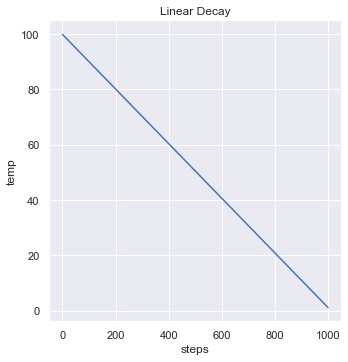

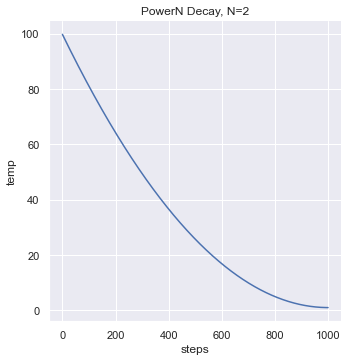

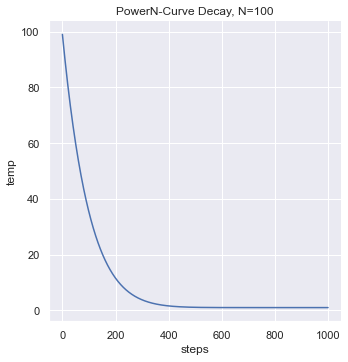

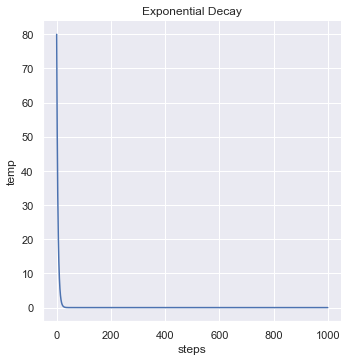

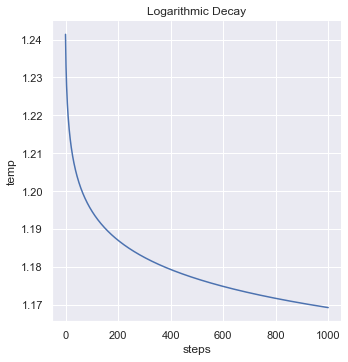

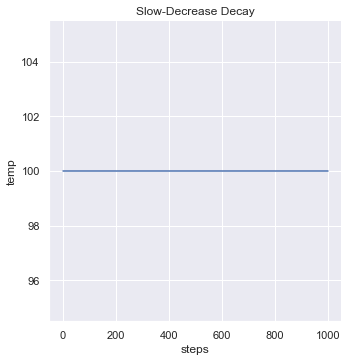

In [133]:
import seaborn as sns 
import math

def scheduler(typ_decay: int = 1, stp_max: int = 1000, power: int = 1, alpha: float = 0.8, tmp_max: float = 100.0, tmp_min: float = 1.0): 
    ''' Returns a list of temperatures to be used 

    Inputs:
        typ_decay: see while loop for assignment of decay type to int
        power : Nth power of Power-N curve 
        stp_max: number of steps.
        alpha: tuning for quadratic and logarithmic functions
        tmp_max = max temperature. arbitrarily at 100 
        tmp_min = min temperature. currently at 1.0

    ref: https://www.cuemath.com/exponential-decay-formula/
    '''
    
    ''' Initialize '''
    stp_current = 1
    stp_max = stp_max + 1
    tmp_current = tmp_max
    tmp_range = tmp_max - tmp_min
    power = power 
    tmp = []
    

    while stp_current < stp_max:
        
        '''Power-N Curve Cooling''' #🟢 this works best for high number of steps  
        if typ_decay == 1: 
            tmp_current = tmp_min + tmp_range * ((stp_max - stp_current) / stp_max) ** power
            # tmp_current = tmp_max / (1 + alpha * stp_current ** 2)
        
        '''Exponential Cooling'''
        if typ_decay == 2: 
            tmp_current = tmp_max * alpha ** stp_current 
        
        '''Logarithmic Cooling'''
        if typ_decay == 3: 
            tmp_current = tmp_max / (alpha * math.log(stp_current + 1))
        
        '''Slowing-Decrease Cooling'''
        if typ_decay == 3: 
            tmp_current = tmp_current / (1 + alpha * tmp_current)

        '''update variables'''
        tmp.append(tmp_current)
        stp_current += 1  

    return tmp 

''' #🔴 this is helper function for cooling schedule from AIMA4e. Not sure how to work it so left it out. 
def exp_schedule(k=20, lam=0.005, limit=1000):
    """One possible schedule function for simulated annealing"""
    return lambda t: (k * 2.718281**(-lam * t) if t < limit else 0)

exp = [] 
for i in range(100):
    exp.append(exp_schedule)
print (exp)
'''
    

'''
Debugging & Testing
'''

#plot
sns.set_theme() 

title = 'Linear Decay'
plot_1 = {}
plot_1['temp'] = scheduler(1, 1000, 1)
plot_1['steps'] = [i for i in range(len(plot_1['temp']))]
# print (plot)
sns.relplot(data = plot_1, y = 'temp', x = 'steps', kind = "line").set(title = title)

title = 'PowerN Decay, N=2'
plot_2 = {}
plot_2['temp'] = scheduler(1, 1000, 2)
plot_2['steps'] = [i for i in range(len(plot_2['temp']))]
# print (plot)
sns.relplot(data = plot_2, y = 'temp', x = 'steps', kind = "line").set(title = title)

title = 'PowerN-Curve Decay, N=100'
plot_3 = {}
plot_3['temp'] = scheduler(1, 1000, 10)
plot_3['steps'] = [i for i in range(len(plot_3['temp']))]
# print (plot)
sns.relplot(data = plot_3, y = 'temp', x = 'steps', kind = "line").set(title = title)

title = 'Exponential Decay'
plot_4 = {}
plot_4['temp'] = scheduler(2)
plot_4['steps'] = [i for i in range(len(plot_4['temp']))]
# print (plot)
sns.relplot(data = plot_4, y = 'temp', x = 'steps', kind = "line").set(title = title)

title = 'Logarithmic Decay'
plot_5 = {}
plot_5['temp'] = scheduler(3)
plot_5['steps'] = [i for i in range(len(plot_4['temp']))]
# print (plot)
sns.relplot(data = plot_5, y = 'temp', x = 'steps', kind = "line").set(title = title)

title = 'Slow-Decrease Decay'
plot_6 = {}
plot_6['temp'] = scheduler(4)
plot_6['steps'] = [i for i in range(len(plot_6['temp']))]
# print (plot)
sns.relplot(data = plot_6, y = 'temp', x = 'steps', kind = "line").set(title = title)

#🔴 to solve: how to plot multiple figures in same chart wo using dataframes AND retaining labels

# Exercise


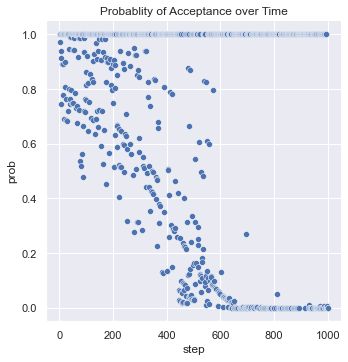

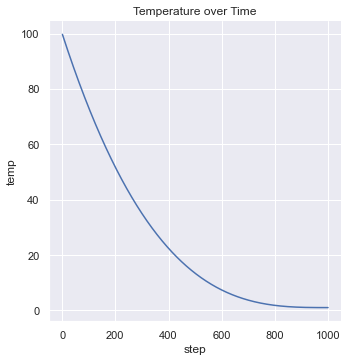

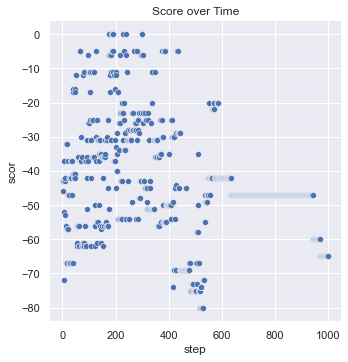

In [114]:
import math 
import matplotlib.pyplot as plt

def simulated_annealing_full (state_initial, sch_type: int = 1, sch_steps: int = 1000, sch_power: float = 2, lookup = LOOKUP_genome_overlap):
    """ This version returns all the states encountered in reaching 
    the goal state."""

    #initialize 
    state_log = []
    step = 0 
    state_current = state_initial 
    sch_temp = scheduler(sch_type, sch_steps, sch_power) 

    #create logging  
    log = {}
    log['temp'] = []
    log['accp'] = []
    log['delt'] = []
    log['step'] = []
    log['scor'] = []
    log['prob'] = []

    # run algorithm
    state_log.append(state_current)
    while sch_temp:
        temp = sch_temp.pop(0)
        
        # Generate next & evaluate 
        state_next = two_opt(state_current)
        energy_current = overlap_score(state_current, lookup)
        energy_next = overlap_score(state_next, lookup)
        energy_delta = energy_current - energy_next
        if energy_delta < 0: 
            probablity_score = (math.e ** (energy_delta / temp))
            accept = probability(probablity_score)
        else:
            probablity_score = 1
            accept = True 
        
        '''Update for next cycle'''
        if accept: 
            state_current = state_next

        # LOGGING
        step += 1
        state_log.append(state_current)
        log['temp'].append(temp)
        log['accp'].append(accept)
        log['delt'].append(energy_delta)
        log['step'].append(step)
        log['prob'].append(probablity_score)
        log['scor'].append(overlap_score(state_current, lookup))

        
    return log 


''' 
DEBUG + TESTING 
'''

initial = LOOKUP_genome_overlap.nodes()
# initial = gbf(LOOKUP_genome_overlap)
states = simulated_annealing_full(initial, 1, 1000, 3)

#print graphs 
title = 'Probablity of Acceptance over Time'
sns.relplot(data = states, y = 'prob', x = 'step', kind = "scatter").set(title = title)

title = 'Temperature over Time'
sns.relplot(data = states, y = 'temp', x = 'step', kind = "line").set(title = title)

title = 'Score over Time'
sns.relplot(data = states, y = 'scor', x = 'step', kind = "scatter").set(title = title)


# for state in states: 
#     print (overlap_score(state, LOOKUP_genome_overlap))

### Visualization - multiple plots

Ref: 
- https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn
- https://pythonguides.com/matplotlib-multiple-plots/

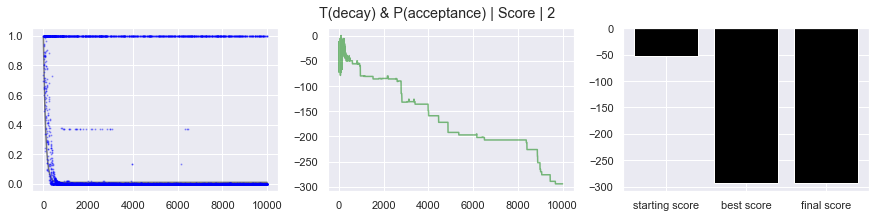

In [129]:
states = states 

def plot_results(states = states, filename = 'default'): 
    ''' Plots the results of search algoritm

    Inputs: 
        state = final state
        filename = filename to save as
    '''
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15,3))

    # Preparing the data to subplots
    x = states.get('step')
    stats = {}
    stats['starting score'] = (states.get('scor')[0]) #starting score 
    stats['best score'] = min(states.get('scor')) #min score 
    stats['final score'] = states.get('scor')[-1] #end score 
    

    ax[0].plot(x, list(map(lambda temp: temp / 100, states['temp'])), color = 'black', alpha = 0.5)
    ax[0].plot(x, states['prob'], linestyle = 'none', marker = 'o', color = 'blue', markersize = 1, alpha = 0.3)
    # ax[0].plot(x, states['scor'], linestyle = 'none', marker = '*', markersize = 5, alpha = 0.3)
    ax[1].plot(x, states['scor'], linestyle = 'solid', color = 'green', alpha = 0.5)
    # ax[1].scatter(x, states['scor'])
    ax[2].bar(stats.keys(), stats.values(), color = 'black')

    # Title 
    plt.suptitle(f'T(decay) & P(acceptance) | Score | {filename}')
    plt.savefig(str(filename))
    plt.show() 


plot_results(states, i)

## Exploring hyperparameters 

01 decay power: 0.1, steps = 1000


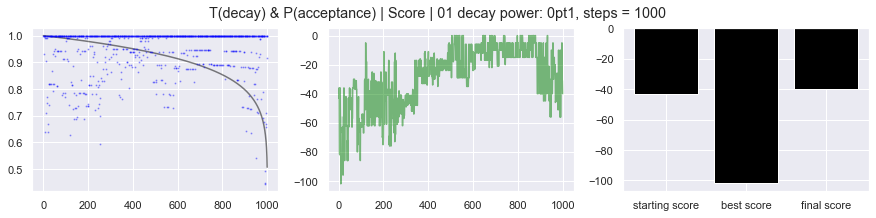

01 decay power: 0.5, steps = 1000


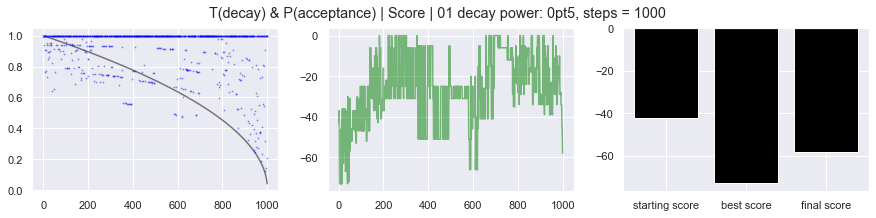

01 decay power: 1, steps = 1000


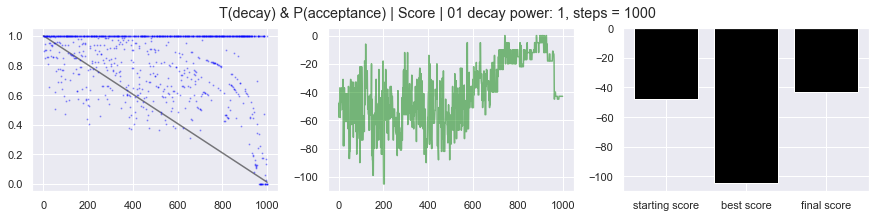

01 decay power: 2, steps = 1000


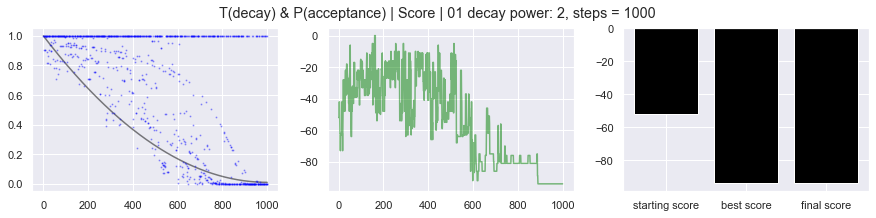

01 decay power: 10, steps = 1000


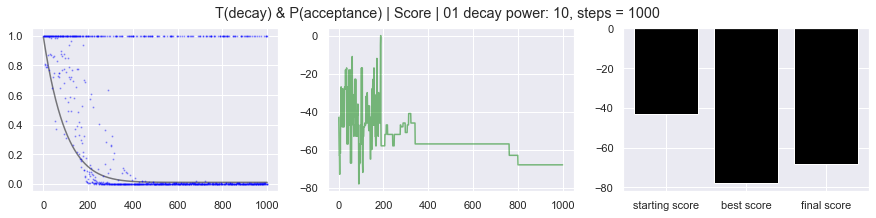

01 decay power: 100, steps = 1000


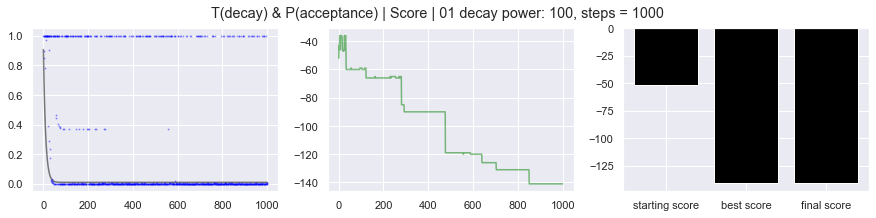

01 decay power: 0.1, steps = 10000


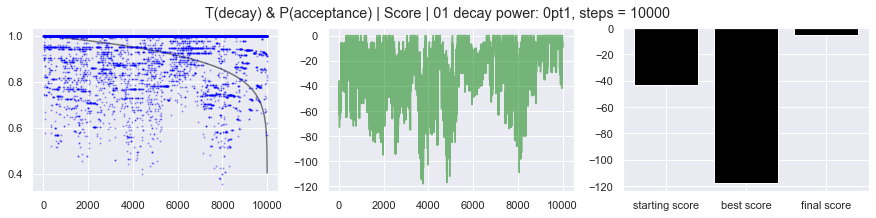

01 decay power: 0.5, steps = 10000


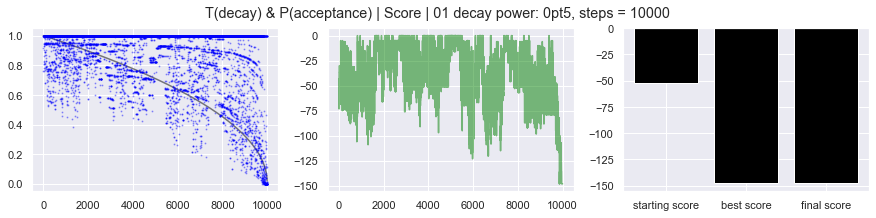

01 decay power: 1, steps = 10000


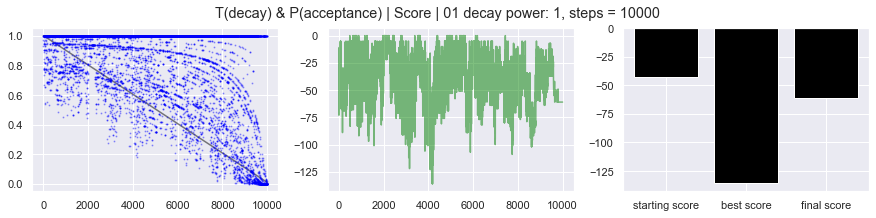

01 decay power: 2, steps = 10000


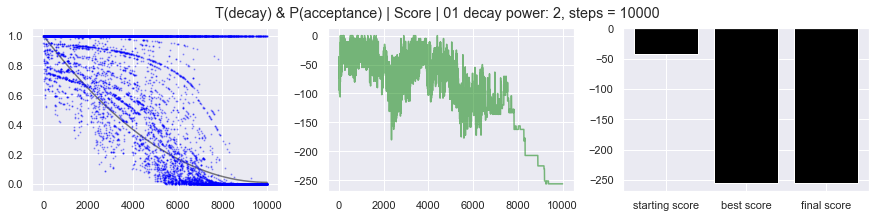

01 decay power: 10, steps = 10000


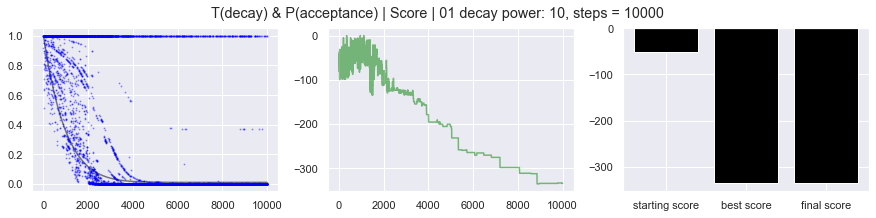

01 decay power: 100, steps = 10000


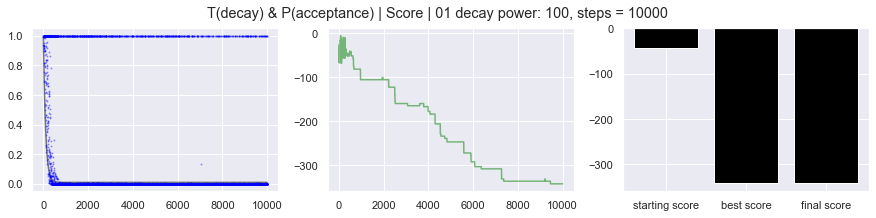

In [130]:
# Test for range and decay power 

step_range = [1000, 10000]
decay_power = [1/10, 1/2, 1, 2, 10, 100]
state_log = {} 

for steps in step_range: 
    for power in decay_power:
        initial = LOOKUP_genome_overlap.nodes()
        title = str(f'01 decay power: {power}, steps = {steps}')
        print (title)
        states = simulated_annealing_full(initial, sch_type = 1, sch_steps = steps, sch_power = power) 
        plot_results (states, title.replace(".", "pt"))


## Exploring Initial States 

From the previous test, we learn that decay powers >2 work better. Allowing the stochastic function to be too 'loose', in the long run, results in final scores worse off than the best score. 

In this test we start with a more optimized initial state by using a GBF initializer. 


04 decay power: 10, steps = 10000


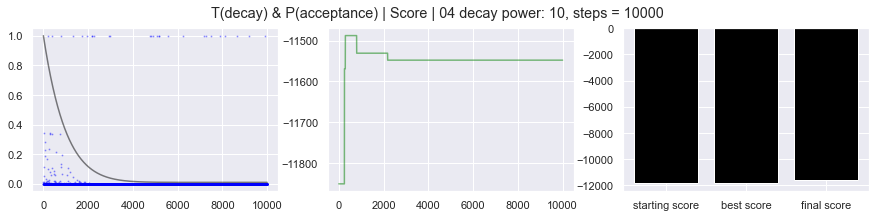

04 decay power: 100, steps = 10000


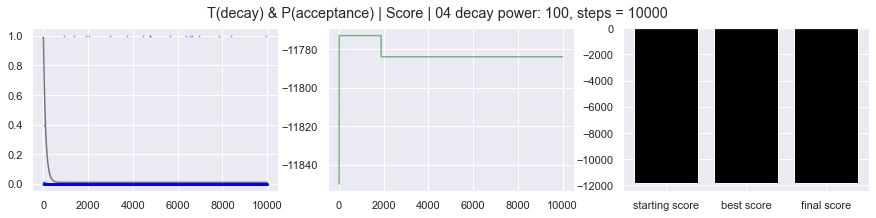

04 decay power: 10, steps = 100000


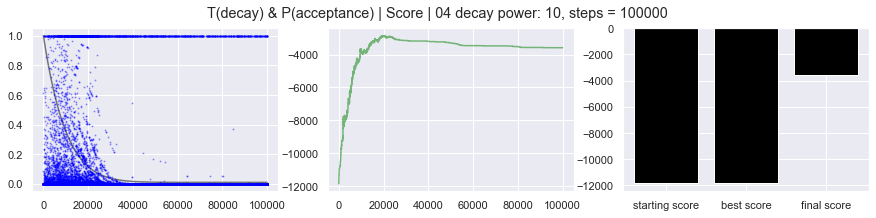

04 decay power: 100, steps = 100000


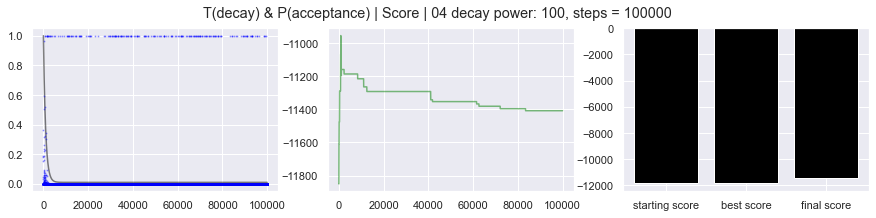

In [131]:
# Test for range and decay power 
step_range = [10000, 100000]
decay_power = [10, 100]

initial = gbf(LOOKUP_genome_overlap) 
for steps in step_range: 
    for power in decay_power:
        title = str(f'04 decay power: {power}, steps = {steps}')
        print (title)
        states = simulated_annealing_full(initial, sch_type = 1, sch_steps = steps, sch_power = power) 
        plot_results (states, title.replace(".", "pt"))


Observations 
- when score is optimized, an outlier neighbour can derail the process. 